<a href="https://colab.research.google.com/github/TAEO2474/python-dev/blob/main/409_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%82%AC%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 실행 후  메뉴에서 런타임 > 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [21]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')   # 나눔 바른 고딕 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 시계열 데이터 표현 2가지 방법
- # ① Timestamp: 정확한 시점 (point in time)
- # ② Period:: 일정한 기간 (span of time)


판단스의 시간 표시 방식 중에서 시계열 데이터 표현에 자주 이용되는 두 가지 유형이 있다.  특정한 시점을 기록하는 Timestamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있다.

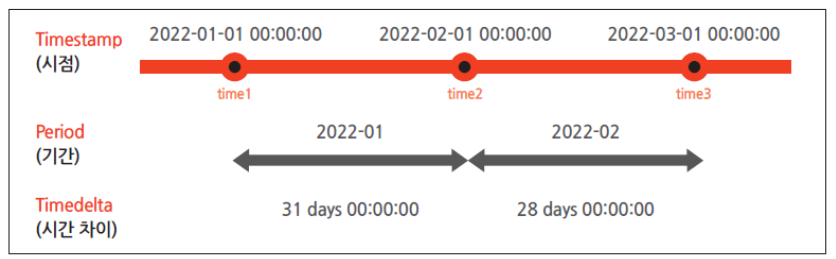

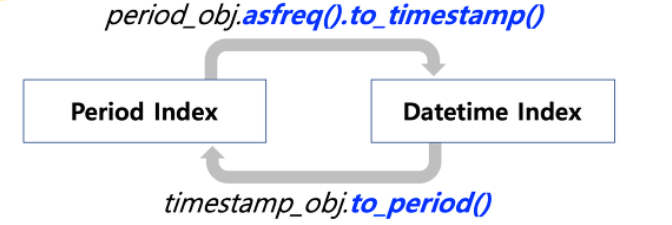

## 1 다른 자료형을 시계열 객체로 변환
1) 문자열을 Timestamp로 변환    
2) Timestam을 Period로 변환

# ① 문자열을 Timestamp 클래스로 변환

In [22]:
import pandas as pd
data = {
'date': ['2024-01-01 12:34:56', '2024-02-01 23:45:01', '2024-03-01 06:07:08', '2021-04-01 14:15:16'],
'value': [100, 201, 302, 404]
}
df = pd.DataFrame(data)
print(df.info( ))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    4 non-null      object
 1   value   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes
None


In [23]:
# Timestamp 는 한번에 한 시간대를 넣을 수 있지만 to_datetime 여러 데이터를 한번에 넣을 수 있다.
# 여러 데이터를 넣었을 때 이를 DatetimeIndex 형식으로 반환한다.

# Timestamp()로 데이터 생성
ts1 = pd.Timestamp('2025-01-01 12:34:56')
print(type(ts1))  # pandas._libs.tslibs.timestamps.Timestamp

# 문자열을 날짜 형식으로 변환
ts2 = pd.to_datetime(['2025-01-01 12:34:56', '2025-01-02 12:34:56'])
print(type(ts2))  # pandas.core.indexes.datetimes.DatetimeIndex

# 문자열을 날짜 형식으로 변환
df['date'] = pd.to_datetime(df['date'])
print(df.head(2))
print(df.info())

# datetime64은 numpy와 pandas에서 사용하는 기본 날짜 및 시간 데이터 타입이면 ns는 nano-second를 의미한다.

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
                 date  value
0 2024-01-01 12:34:56    100
1 2024-02-01 23:45:01    201
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4 non-null      datetime64[ns]
 1   value   4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 196.0 bytes
None


# pandas.to_datetime() 함수
-  다양한 날짜 문자열을 자동 파싱(auto-parsing) 하여 내부적으로 ISO 8601 형식으로 변환한다.


# [ pd.to_datetime() 변환 결과 요약표]

| 입력 날짜 형식               | 설명                                   | 변환된 결과 (`Timestamp`)                    |
| ---------------------- | ------------------------------------ | --------------------------------------- |
| `2024-01-01`           | ISO 8601 기본 형식 (`YYYY-MM-DD`)        | `Timestamp('2024-01-01 00:00:00')`      |
| `2024/01/01`           | 슬래시 `/` 구분자 사용                       | `Timestamp('2024-01-01 00:00:00')`      |
| `01-01-2024`           | 일-월-년 형식 (`DD-MM-YYYY`) *(지역 설정 필요)* | `Timestamp('2024-01-01 00:00:00')`      |
| `January 1, 2024`      | 영어 월 이름 포함                           | `Timestamp('2024-01-01 00:00:00')`      |
| `1 Jan 2024`           | 축약된 영어 월 + 일 + 년                     | `Timestamp('2024-01-01 00:00:00')`      |
| `20240101`             | 연속된 숫자 형식 (`YYYYMMDD`)               | `Timestamp('2024-01-01 00:00:00')`      |
| `2024.01.01`           | 점 `.` 구분자 사용                         | `Timestamp('2024-01-01 00:00:00')`      |
| `2024년 01월 01일`        | 한글 포함 형식<br>+ format 명시 필수           | `Timestamp('2024-01-01 00:00:00')`      |
| `2024-01-01 15:30`     | 날짜 + 시간 (시:분)                        | `Timestamp('2024-01-01 15:30:00')`      |
| `2024-01-01T15:30:00Z` | ISO 8601 완전 형식 (UTC, `T`, `Z` 포함)    | `Timestamp('2024-01-01 15:30:00+0000')` |


In [24]:
pd.to_datetime('January 1, 2024')

Timestamp('2024-01-01 00:00:00')

In [25]:
pd.to_datetime('31-01-2024')

/tmp/ipython-input-25-1351312431.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime('31-01-2024')


Timestamp('2024-01-31 00:00:00')

to_datetime()은 비표준화 형식의 날짜 문자열의 경우 날짜 형식으로 자동 변환되지 않는다.그래서 format옵션을 지정해서 해결해야 한다.  


In [26]:
# pd.to_datetime('월-년도-일')는 표준형식이 아니므로 format 옵션을 설정해야 한다.
pd.to_datetime('02-2024-01', format='%m-%Y-%d')

Timestamp('2024-02-01 00:00:00')

to_datetime()은 비표준화 형식의 날짜 문자열의 경우 날짜 형식으로 자동 변환되지 않는다.그래서 format옵션을 지정해서 해결해야 한다.  

```
pd.to_datetime('02-2024-01', format = '%m-%Y-%d')
```
Timestamp.strftime() / datetime.strftime() 포맷 코드 정리표

| 코드   | 의미                       | 예시 (`2025-07-26 15:45:30`) |
| ---- | ------------------------ | -------------------------- |
| `%Y` | 4자리 연도                   | `2025`                     |
| `%y` | 2자리 연도                   | `25`                       |
| `%m` | 2자리 월 (01\~12)           | `07`                       |
| `%B` | 전체 월 이름                  | `July`                     |
| `%b` | 축약 월 이름                  | `Jul`                      |
| `%d` | 2자리 일 (01\~31)           | `26`                       |
| `%A` | 전체 요일 이름                 | `Saturday`                 |
| `%a` | 축약 요일 이름                 | `Sat`                      |
| `%H` | 24시간제 시 (00\~23)         | `15`                       |
| `%I` | 12시간제 시 (01\~12)         | `03`                       |
| `%p` | 오전/오후 (AM/PM)            | `PM`                       |
| `%M` | 분 (00\~59)               | `45`                       |
| `%S` | 초 (00\~59)               | `30`                       |
| `%f` | 마이크로초 (000000\~999999)   | `000000`                   |
| `%z` | UTC 오프셋                  | `+0000` 또는 `+09:00`        |
| `%Z` | 시간대 이름                   | `UTC`, `KST` 등             |
| `%j` | 1년 중 몇 번째 날인지 (001\~366) | `207`                      |
| `%U` | 1년 중 몇 번째 주 (일요일 시작)     | `29`                       |
| `%W` | 1년 중 몇 번째 주 (월요일 시작)     | `30`                       |
| `%c` | 전체 날짜와 시간                | `Sat Jul 26 15:45:30 2025` |
| `%x` | 로컬 날짜 표현                 | `07/26/25` 또는 `2025.07.26` |
| `%X` | 로컬 시간 표현                 | `15:45:30`                 |


In [27]:
# 한글이 포함되여 있으면 format옵션을 설정하면 된다.
dt = pd.to_datetime('2024년 01월 01일', format='%Y년 %m월 %d일')
print(dt)
print(type(dt))  #pandas._libs.tslibs.timestamps.Timestamp

stime = dt.strftime('%Y년 %m월 %d일')
print(stime)
print(type(stime))


2024-01-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2024년 01월 01일
<class 'str'>


2) Timestam을 Period로 변환

pandas Period 객체의 freq 옵션 정리표


| 옵션       | 설명                         | 옵션                 | 설명                            |
| -------- | -------------------------- | ------------------ | ----------------------------- |
| `D`      | Day (1일)                   | `B`                | Business day (주말 제외한 평일)      |
| `W`      | Week (주 1회, 일요일 기준)        | `W-MON` \~ `W-SUN` | 특정 요일 기준 주간 주기                |
| `M`      | Month End (월말)             | `MS`               | Month Start (월초)              |
| `Q`      | Quarter End (분기 말)         | `QS`               | Quarter Start (분기 초)          |
| `A`, `Y` | Year End (연말)              | `AS`, `YS`         | Year Start (연초)               |
| `H`      | Hour (시간 단위)               | `T` or `min`       | Minute (분 단위)                 |
| `S`      | Second (초 단위)              | `L`                | Millisecond (1/1,000초)        |
| `U`      | Microsecond (1/1,000,000초) | `N`                | Nanosecond (1/1,000,000,000초) |

| 옵션           | 의미                  | 주의사항                         |
| ------------ | ------------------- | ---------------------------- |
| `Y` 또는 `A`   | 연말 기준 (기본: 12월 31일) | `A-MAR`처럼 기준월 변경 가능          |
| `YS` 또는 `AS` | 연초 기준 (기본: 1월 1일)   | 회계 연도 등 시작월 변경 가능 (`AS-JUL`) |



- W-MON 또는 W-FRI 등은 시작 요일을 지정한 주 단위 주기입니다.
- Q, A는 기본적으로 연말을 기준으로 하지만, Q-JAN, A-JUN 등 기준 월 변경도 가능합니다.
- PeriodIndex, period_range(), resample() 등에 모두 사용됩니다.

In [28]:
# timestamp을 period날짜 형식으로 변환
dates = ['2025-01-01','2025-03-01','2025-06-01']
print(dates[0], type(dates[0]))  # 2025-01-01 <class 'str'>

# 문자열의 배열(시리즈 객체)를 판단스 Timestamp로 변환
ts = pd.to_datetime(dates)
print(ts) #DatetimeIndex(['2025-01-01', '2025-03-01', '2025-06-01'], dtype='datetime64[ns]', freq=None)


# Timestamp을 Period로 변환
print(ts.to_period(freq='D'))
print(ts.to_period(freq='M'))
print(ts.to_period(freq='Y'))


2025-01-01 <class 'str'>
DatetimeIndex(['2025-01-01', '2025-03-01', '2025-06-01'], dtype='datetime64[ns]', freq=None)
PeriodIndex(['2025-01-01', '2025-03-01', '2025-06-01'], dtype='period[D]')
PeriodIndex(['2025-01', '2025-03', '2025-06'], dtype='period[M]')
PeriodIndex(['2025', '2025', '2025'], dtype='period[Y-DEC]')


## ② 시계열 데이터 만들기


| 항목       | Timestamp 배열                      | Period 배열                         |
| -------- | --------------------------------- | --------------------------------- |
| 생성 함수    | `pd.date_range()`                 | `pd.period_range()`               |
| 결과 타입    | `DatetimeIndex` (`Timestamp`)     | `PeriodIndex` (`Period`)          |
| 시간 정보    | 시/분/초 단위까지 가능                     | 추상적 구간 (예: "2025년 1월")            |
| 용도       | 시계열 그래프, 리샘플링, 시간 연산 등            | 회계 기간, 월별 통계, 구간 분석 등             |
| 변환 가능 여부 | `.to_period()`, `.to_timestamp()` | `.to_timestamp()`, `.to_period()` |


1) Timestamp 배열

In [29]:
# 2025년 1월 1일부터 10일간의 일별 시계열
timestamps = pd.date_range(start='2025-01-01', periods=10, freq='D')
print(timestamps)

timestamps = pd.date_range(start='2025-01-01',end='2025-01-10', freq='D')
timestamps = pd.date_range('2025-01-01','2025-01-10', freq='D')
print(timestamps)

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10'],
              dtype='datetime64[ns]', freq='D')


2) Period 배열

In [30]:
# 2025년 1월 부터 6개월 간의 월별 기간 생성
periods = pd.period_range(start='2025-01', periods=6, freq='M')
print(periods)

periods = pd.period_range(start='2025-01', end='2025-06', freq='M')
print(periods)

PeriodIndex(['2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06'], dtype='period[M]')
PeriodIndex(['2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06'], dtype='period[M]')


3) 변환(Period -> Timestamp, Timestamp -> Period)

In [31]:
# Timestamp -> Period
ttp = timestamps[0].to_period('M')
print(ttp, type(ttp))

# Period -> Timestmap
ptt = periods[0].to_timestamp()
print(ptt, type(ptt))

2025-01 <class 'pandas._libs.tslibs.period.Period'>
2025-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


### ③ 날짜 연산

colab에서 한국시간대로 설정

In [32]:
from datetime import datetime
import pytz

# 한국 시간대 설정
kst = pytz.timezone('Asia/Seoul')

# 현재 UTC 시간을 한국 시간으로 변환
kst_time = datetime.now(kst)

print("한국 시간:", kst_time.strftime('%Y-%m-%d %H:%M:%S'))

한국 시간: 2025-07-28 14:37:15


In [33]:
# 현재 날짜 생성
today = pd.Timestamp.today(kst)
print(f'today: {today}')

print(dir(today))
only_date = today.date()
print(f'only_date: {only_date}' )
only_time = today.time()
print(f'only_date: {only_time}')

# .normalized() 사용 (시간을 00:00:00으로 초기화)
normalized = today.normalize()
print(f'normalized: {normalized}')

# 문자열을 datetime으로 변경
df['date'] = pd.to_datetime(df['date']).dt.tz_localize(kst)


# 날짜 차이 계산
print(type(normalized - df['date']))
# dt.days는 TimedeltaProperties 객체에서 정수형 날짜 차이만 추출하는 기능
print((normalized - df['date']).dt)
print(dir((normalized - df['date']).dt))
df['days_diff'] = (normalized - df['date']).dt.days
#print((normalized - df['date']).dt.days)
df.head()

today: 2025-07-28 14:37:15.294829+09:00
['__add__', '__array_priority__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__radd__', '__reduce__', '__reduce_cython__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__setstate_cython__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_creso', '_date_repr', '_from_dt64', '_from_value_and_reso', '_repr_base', '_round', '_time_repr', '_value', 'as_unit', 'asm8', 'astimezone', 'ceil', 'combine', 'ctime', 'date', 'day', 'day_name', 'day_of_week', 'day_of_year', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'dst', 'floor', 'fold', 'fromisocalendar', 'fromisoformat', 'fromordinal', 'fromtimestamp', 'hour', 'is_leap_year', 'is_month_end', 'is_month_start', 'is_quarter_end',

,date,value,days_diff
0,2024-01-01 12:34:56+09:00,100,573
1,2024-02-01 23:45:01+09:00,201,542
2,2024-03-01 06:07:08+09:00,302,513
3,2021-04-01 14:15:16+09:00,404,1578


## ④ 날짜 정보 추출
object 형식인  date컬럼을 날짜 형식으로 변환했으므로, 연도, 월, 일,  요일 등 시간 정보를 쉽게 추출 할 수 있다.  
날짜 및 시간 데이터에 특화된 접근자인 dt를 사용 할 수 있다.

pandas.Series.dt 날짜/시간 속성 정리표

| 속성                   | 설명                 | 예시 값 (`2025-07-26 15:45:30`)        |
| -------------------- | ------------------ | ----------------------------------- |
| `.year`              | 연도 (4자리)           | `2025`                              |
| `.month`             | 월 (1\~12)          | `7`                                 |
| `.day`               | 일 (1\~31)          | `26`                                |
| `.hour`              | 시 (0\~23)          | `15`                                |
| `.minute`            | 분 (0\~59)          | `45`                                |
| `.second`            | 초 (0\~59)          | `30`                                |
| `.microsecond`       | 마이크로초 (0\~999999)  | `0`                                 |
| `.nanosecond`        | 나노초 (0\~999999999) | `0`                                 |
| `.dayofweek`         | 요일 번호 (월:0 \~ 일:6) | `5` (토요일)                           |
| `.weekday`           | `.dayofweek`와 동일   | `5`                                 |
| `.day_name()`        | 요일 이름              | `"Saturday"`                        |
| `.month_name()`      | 월 이름               | `"July"`                            |
| `.week` *(경고)*       | 해당 연도의 몇 번째 주      | (경고: deprecated → `.isocalendar()`) |
| `.weekofyear` *(경고)* | `.week`와 동일        | (경고)                                |
| `.quarter`           |                    |                                     |


In [34]:
# 연도 추출
df['year'] = df['date'].dt.year
# 월 추출
df['month'] = df['date'].dt.month
# 일 추출
df['day'] = df['date'].dt.day
# 요일 추출
df['wday'] = df['date'].dt.day_name( )
df['wday2'] = df['date'].dt.weekday
# 시간 추출
df['hour'] = df['date'].dt.hour
# 분 추출
df['minute'] = df['date'].dt.minute
# 초 추출
df['second'] = df['date'].dt.second
# 년-월-일 출력
print(df['date'].dt.date)
# df 확인
print(df.head(2))

0    2024-01-01
1    2024-02-01
2    2024-03-01
3    2021-04-01
Name: date, dtype: object
                       date  value  days_diff  year  month  day      wday  \
0 2024-01-01 12:34:56+09:00    100        573  2024      1    1    Monday   
1 2024-02-01 23:45:01+09:00    201        542  2024      2    1  Thursday   

   wday2  hour  minute  second  
0      0    12      34      56  
1      3    23      45       1  


/tmp/ipython-input-35-3842644945.py:45: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:45: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:45: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:45: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:45: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:45: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PY

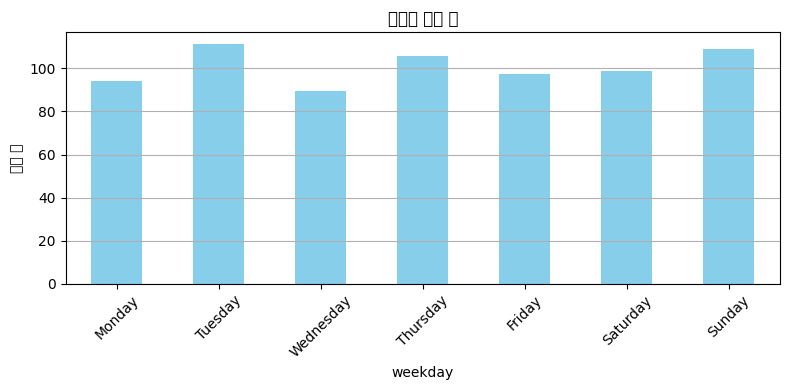

/tmp/ipython-input-35-3842644945.py:57: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:57: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:57: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:57: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:57: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:

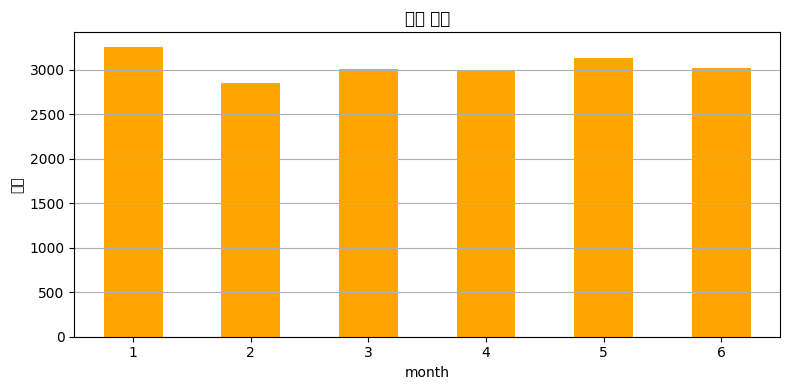

/tmp/ipython-input-35-3842644945.py:70: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:70: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:70: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:70: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:70: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-35-3842644945.py:70: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GAB

          date  value  year  month  day    weekday  week  is_month_end
30  2025-01-31    143  2025      1   31     Friday     5          True
58  2025-02-28    113  2025      2   28     Friday     9          True
89  2025-03-31     83  2025      3   31     Monday    14          True
119 2025-04-30    104  2025      4   30  Wednesday    18          True
150 2025-05-31    145  2025      5   31   Saturday    22          True
180 2025-06-30     97  2025      6   30     Monday    27          True


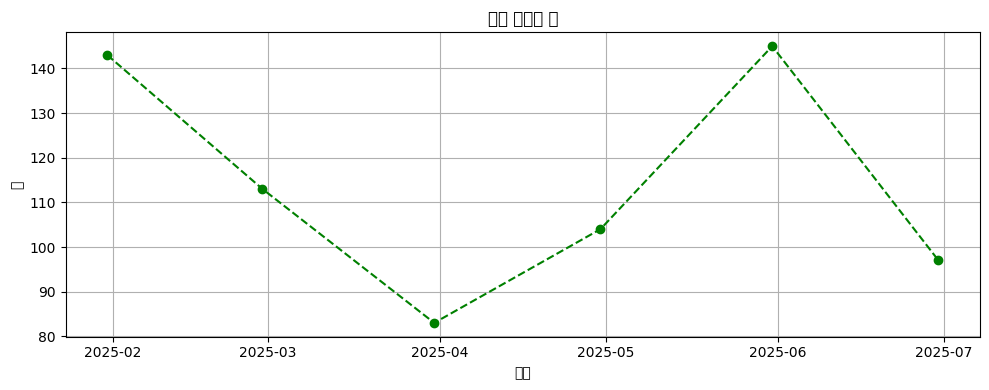

In [35]:
# 데이터프레임 생성
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

# 날짜 6개월치 데이터 생성 (2025년 1월~6월)
date_rng = pd.date_range(start='2025-01-01', end='2025-06-30', freq='D')

# 예시 데이터프레임
df = pd.DataFrame({
    'date': date_rng,
    'value': np.random.randint(50, 150, size=len(date_rng))
})


# 날짜 컬럼 datetime 형식 보장
df['date'] = pd.to_datetime(df['date'])

#.dt 속성 추출 적용
# 날짜 정보 추출
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.day_name()
df['week'] = df['date'].dt.isocalendar().week
df['is_month_end'] = df['date'].dt.is_month_end



# 1: 요일별 평균 값 시각화
# 요일별 평균값 계산
weekday_avg = df.groupby('weekday')['value'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])



# 시각화
plt.figure(figsize=(8, 4))
weekday_avg.plot(kind='bar', color='skyblue')
plt.title("요일별 평균 값")
plt.ylabel("평균 값")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2: 월별 총합 시각화
monthly_sum = df.groupby('month')['value'].sum()

plt.figure(figsize=(8, 4))
monthly_sum.plot(kind='bar', color='orange')
plt.title("월별 총합")
plt.ylabel("합계")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3: 월말 데이터만 추출하여 시각화
month_end_data = df[df['is_month_end']]
print(month_end_data)

plt.figure(figsize=(10, 4))
plt.plot(month_end_data['date'], month_end_data['value'], marker='o', linestyle='--', color='green')
plt.title("월말 날짜별 값")
plt.xlabel("날짜")
plt.ylabel("값")
plt.grid(True)
plt.tight_layout()
plt.show()


# pandas에서는 .resample()을 사용해 시계열 데이터를 주기별로 집계할 수 있다.
# 여기서는 2주 간격, 분기 단위 등 특정 주기로 리샘플링하는 실전 예제이다.

/tmp/ipython-input-36-3109552786.py:27: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-36-3109552786.py:27: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-36-3109552786.py:27: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-36-3109552786.py:27: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-36-3109552786.py:27: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-36-3109552786.py:27: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE P

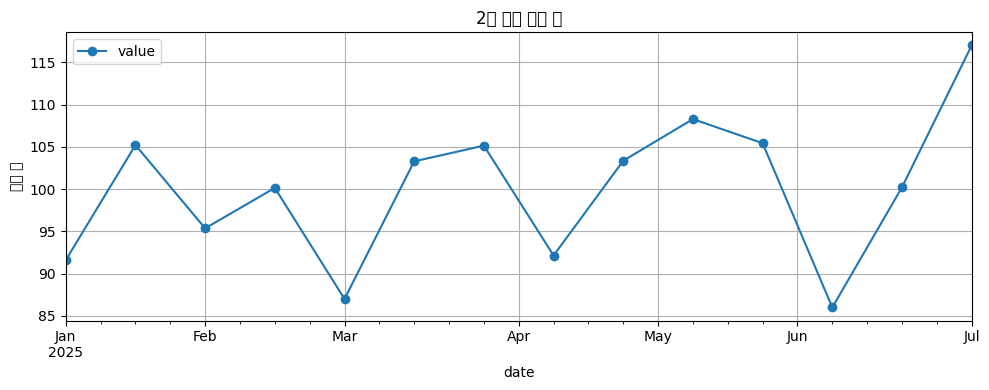

/tmp/ipython-input-36-3109552786.py:33: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_q = df.resample('Q').sum()  # 'Q' = 분기 마지막 달의 말일 기준 (기본은 3, 6, 9, 12월)
/tmp/ipython-input-36-3109552786.py:39: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-36-3109552786.py:39: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-36-3109552786.py:39: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-36-3109552786.py:39: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-36-3109552786.py:39: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/

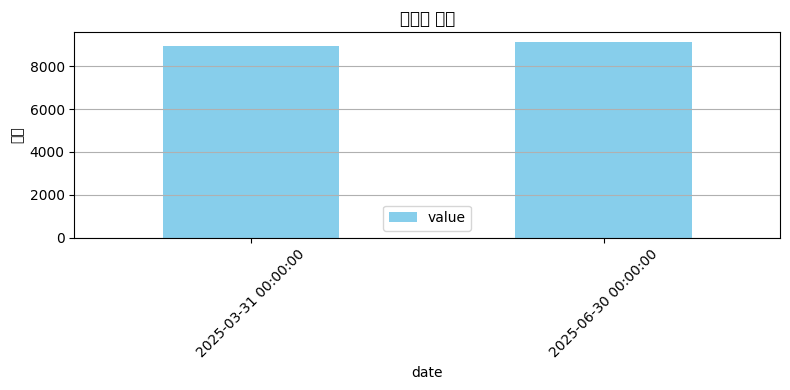

In [36]:
# 데이터 준비
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt

# 일별 데이터 생성 (2025년 1월~6월)
date_rng = pd.date_range(start='2025-01-01', end='2025-06-30', freq='D')

df = pd.DataFrame({
    'date': date_rng,
    'value': np.random.randint(50, 150, size=len(date_rng))
})

# 날짜를 인덱스로 설정 (리샘플링의 핵심)
df.set_index('date', inplace=True)


##############################
#1.  2주 간격 리샘플링 (14일)
# 2주 단위로 평균 집계
df_2w = df.resample('2W').mean()  # '2W' = 2주 (기본: 일요일 기준),  '2W-MON' 으로 하면 월요일 기준 2주 단위

# 시각화
df_2w.plot(marker='o', title='2주 간격 평균 값', figsize=(10, 4))
plt.ylabel('평균 값')
plt.grid(True)
plt.tight_layout()
plt.show()

############################
# 2. 분기 단위 리샘플링 (Q)
# 분기별 총합
df_q = df.resample('Q').sum()  # 'Q' = 분기 마지막 달의 말일 기준 (기본은 3, 6, 9, 12월)

df_q.plot(kind='bar', color='skyblue', title='분기별 총합', figsize=(8, 4))
plt.ylabel('총합')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

